In [129]:
# install Pint if necessary

try:
    import pint
except ImportError:
    !pip install pint

In [130]:
# download modsim.py if necessary

from os.path import basename, exists

def download(url):
    filename = basename(url)
    if not exists(filename):
        from urllib.request import urlretrieve
        local, _ = urlretrieve(url, filename)
        print('Downloaded ' + local)
    
download('https://raw.githubusercontent.com/AllenDowney/' +
         'ModSimPy/master/modsim.py')

In [131]:
# import functions from modsim

from modsim import *

In [132]:
download('https://github.com/AllenDowney/ModSimPy/raw/master/chap11.py')

In [133]:
download('https://github.com/AllenDowney/ModSimPy/raw/master/chap12.py')

In [134]:
# import code from previous notebooks

from chap11 import make_system
from chap11 import update_func
from chap11 import run_simulation
from chap11 import plot_results

from chap12 import calc_total_infected

In [135]:
#Sweeping beta:
beta_array = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0 , 1.1]
gamma = 0.2

0.2

In [136]:
def sweep_beta(beta_array, gamma):
    sweep = SweepSeries()
    for beta in beta_array:
        system = make_system(beta, gamma)
        results = run_simulation(system, update_func)
        sweep[beta] = calc_total_infected(results, system)
    return sweep

In [137]:
infected_sweep = sweep_beta(beta_array, gamma)

Parameter
0.1    0.010756
0.2    0.118984
0.3    0.589095
0.4    0.801339
0.5    0.896577
0.6    0.942929
0.7    0.966299
0.8    0.978152
0.9    0.984057
1.0    0.986882
1.1    0.988148
Name: Metric, dtype: float64

In [138]:
label = f'gamma = {gamma}'
label
beta_array


[0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 1.1]

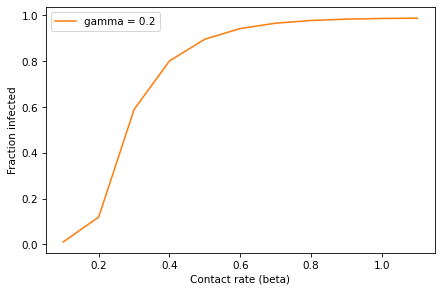

In [139]:
infected_sweep.plot(label=label, color='C1')

decorate(xlabel='Contact rate (beta)',
         ylabel='Fraction infected')

In [140]:
#Sweeping Gamma:
gamma_array = linspace(0.1, 0.7, 4)
gamma_array

array([0.1, 0.3, 0.5, 0.7])

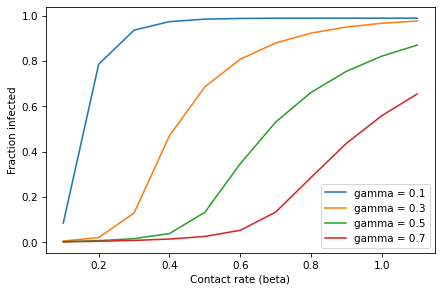

In [141]:
for gamma in gamma_array:
    infected_sweep = sweep_beta(beta_array, gamma)
    label = f'gamma = {gamma}'
    infected_sweep.plot(label=label)
    
decorate(xlabel='Contact rate (beta)',
         ylabel='Fraction infected')

In [142]:
#Using a SweepFrame:
def sweep_parameters(beta_array, gamma_array):
    frame = SweepFrame(columns=gamma_array)
    for gamma in gamma_array:
        frame[gamma] = sweep_beta(beta_array, gamma)
    return frame

In [143]:
frame = sweep_parameters(beta_array, gamma_array)

,0.1,0.3,0.5,0.7
Parameter,,,,
0.1,0.084693,0.005444,0.002736,0.001827
0.2,0.785673,0.020878,0.007235,0.004367
0.3,0.936118,0.128878,0.015929,0.008129
0.4,0.973692,0.470707,0.038603,0.014242
0.5,0.984596,0.686050,0.132438,0.025708
0.6,0.987757,0.807741,0.346765,0.052853
0.7,0.988620,0.879474,0.530585,0.133248
0.8,0.988834,0.923024,0.661553,0.286258
0.9,0.988880,0.949853,0.754595,0.436999


Exercise: If we know beta and gamma, we can compute the fraction of the population that gets infected. In general, we don't know these parameters, but sometimes we can estimate them based on the behavior of an outbreak.

Suppose the infectious period for the Freshman Plague is known to be 2 days on average, and suppose during one particularly bad year, 40% of the class is infected at some point. Estimate the time between contacts, 1/beta

In [144]:
gamma = 0.5
infected_sweep = sweep_beta(beta_array, gamma)

Parameter
0.1    0.002736
0.2    0.007235
0.3    0.015929
0.4    0.038603
0.5    0.132438
0.6    0.346765
0.7    0.530585
0.8    0.661553
0.9    0.754595
1.0    0.821534
1.1    0.870219
Name: Metric, dtype: float64

In [145]:
beta_estimate = crossings(infected_sweep, 0.4)

array([0.62548698])

In [146]:
# Time between contacts is 1/beta

time_between_contacts = 1/beta_estimate

array([1.59875429])